In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from data_info import train_file, NUMERIC_COLUMNS, CSV_COLUMNS
from preprocessing_helpers import extract_data

In [3]:
dataset = extract_data(train_file,CSV_COLUMNS)

In [4]:
dataset.isna().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
iq         

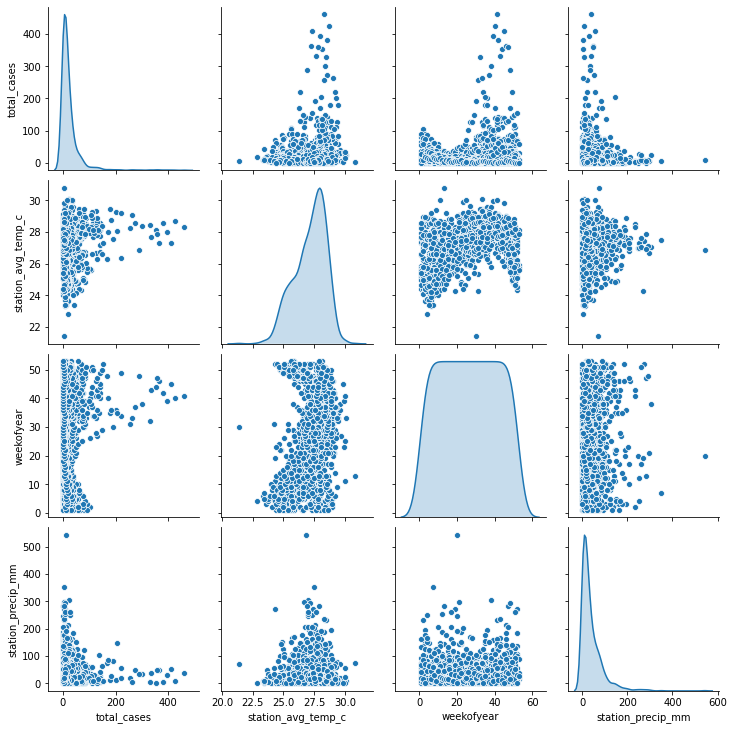

In [5]:
#Most meaningfull data
sns.pairplot(dataset[["total_cases", "station_avg_temp_c", "weekofyear", "station_precip_mm"]], diag_kind="kde")

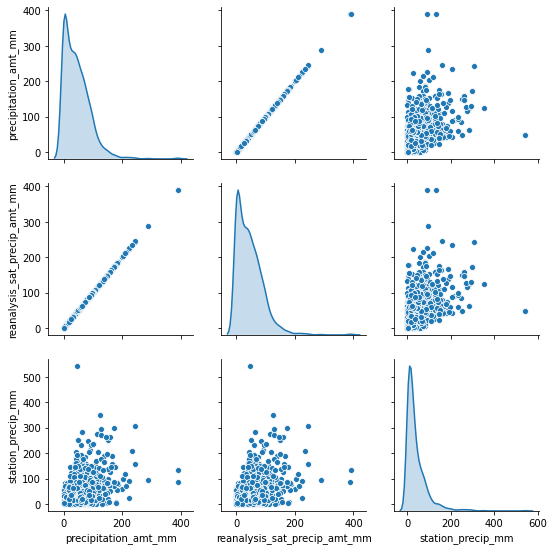

In [7]:
#Check precip dependencies
sns.pairplot(dataset[["precipitation_amt_mm", "reanalysis_sat_precip_amt_mm", "station_precip_mm"]], diag_kind="kde")

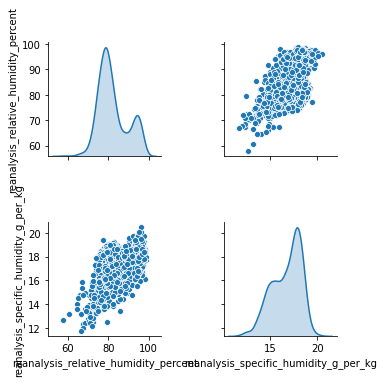

In [8]:
#Check humidity dependencies
sns.pairplot(dataset[["reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg"]], diag_kind="kde")

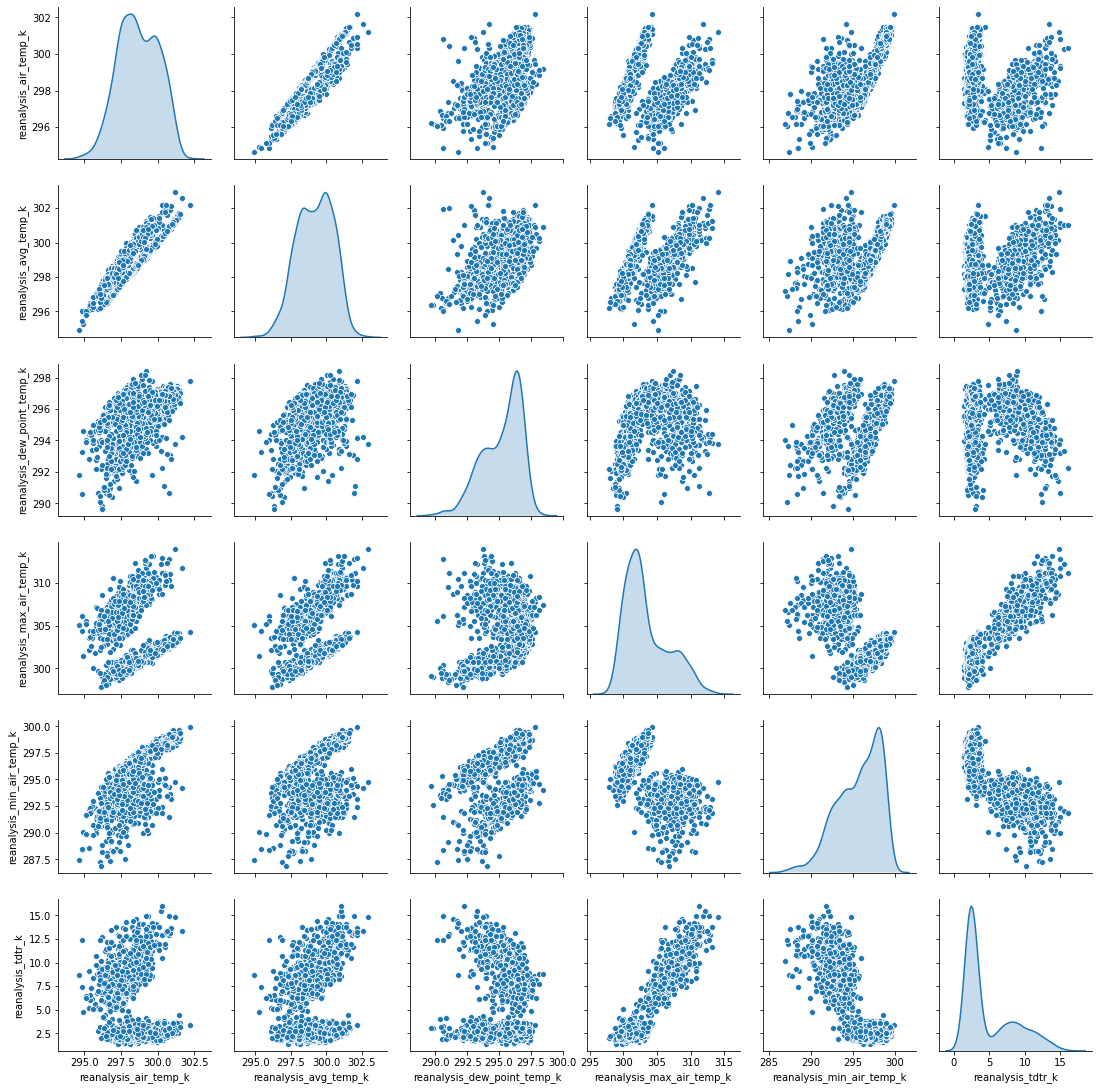

In [14]:
# Check temp dependencies
sns.pairplot(dataset[[
    "reanalysis_air_temp_k",
    "reanalysis_avg_temp_k",
    "reanalysis_dew_point_temp_k",
    "reanalysis_max_air_temp_k",
    "reanalysis_min_air_temp_k",
    "reanalysis_tdtr_k"
]], diag_kind="kde")

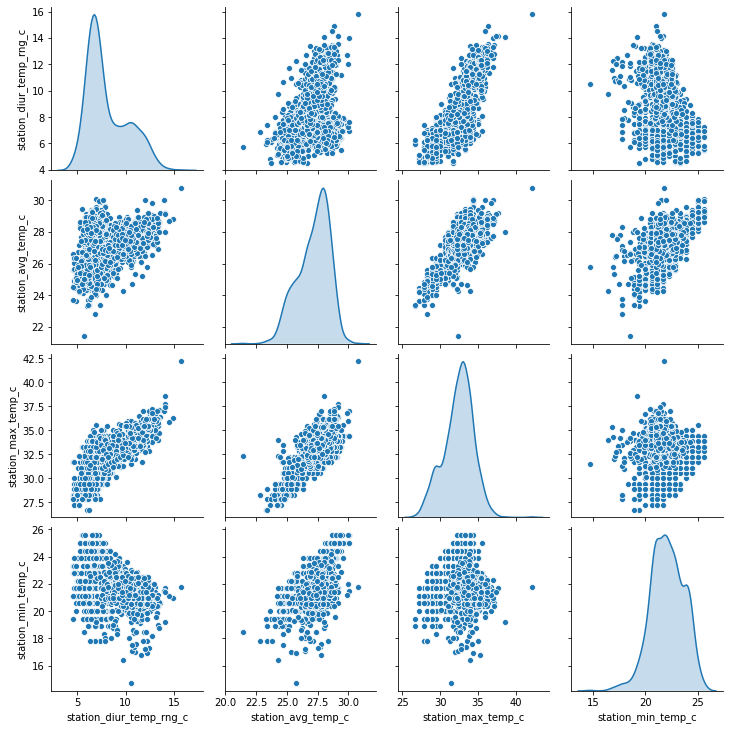

In [16]:
# Check temp dependencies
sns.pairplot(dataset[[
    "station_diur_temp_rng_c",
    "station_avg_temp_c",
#     "station_diur_temp_rng_c",
    "station_max_temp_c",
    "station_min_temp_c"
]], diag_kind="kde")

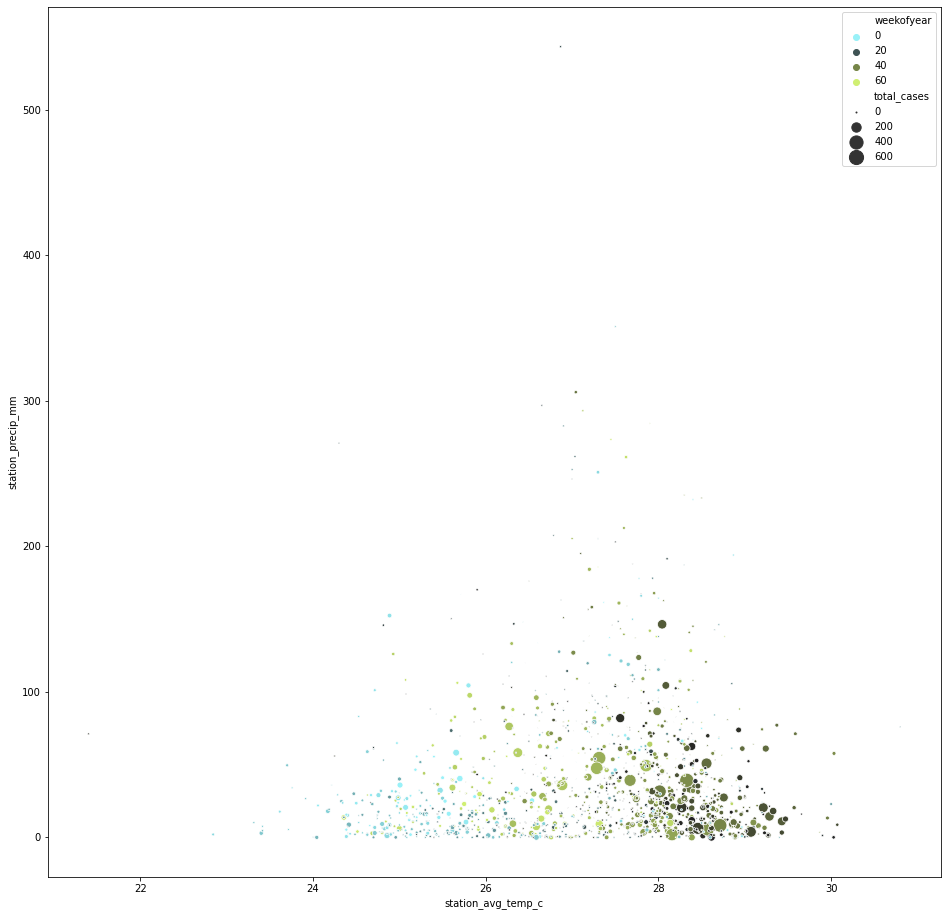

In [52]:
# Year, percip, temp for total cases dependencies
plt.figure(figsize=(16, 16))
cmap = sns.diverging_palette(200, 100, l=90, n=12, center="dark", as_cmap=True)

sns.scatterplot(palette=cmap, x="station_avg_temp_c", y="station_precip_mm", size="total_cases", sizes=(1, 200), hue="weekofyear", data=dataset)